In [3]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Import the libraries and the dataset

In [1]:
import pandas as pd
churn = pd.read_csv('Datasets/TelcoChurn.csv')

1) Display basic information about the dataset.

In [2]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


2). Explore the variable 'churn' with a graph.

<Axes: xlabel='Churn'>

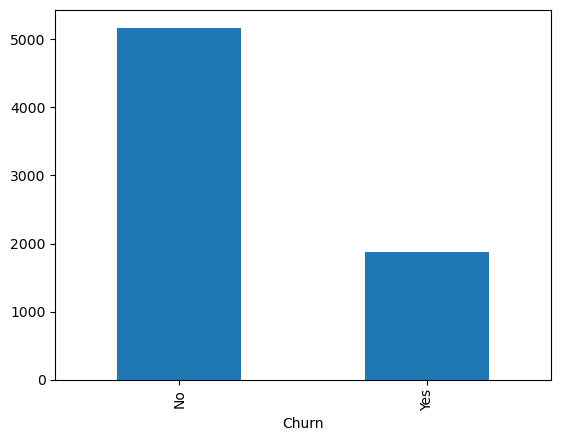

In [3]:
churn['Churn'].value_counts().plot(kind = 'bar')

3). We will run a logistic regression model that predicts 'Churn'. Prepare the data. Hint: consider using patsy as we have done in class practice.

Use the following variables:
'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'MultipleLines', 'InternetService',
      'MonthlyCharges'

In [4]:
import patsy

y, X = patsy.dmatrices('Churn ~ gender + SeniorCitizen + Partner + Dependents\
                       + tenure + MultipleLines + InternetService + MonthlyCharges',
                      data = churn,
                      return_type = 'dataframe')

In [5]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Churn[No]   7043 non-null   float64
 1   Churn[Yes]  7043 non-null   float64
dtypes: float64(2)
memory usage: 165.1 KB


4). Fit the model. Hint: make sure you check y to include the correct dependent variable.

In [6]:
import statsmodels.api as sm
logit_model_1 = sm.Logit(y['Churn[Yes]'], X)
logit_res_1 =  logit_model_1.fit()
logit_res_1.summary()

Optimization terminated successfully.
         Current function value: 0.434579
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Churn[Yes]   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7032
Method:                           MLE   Df Model:                           10
Date:                Mon, 17 Mar 2025   Pseudo R-squ.:                  0.2489
Time:                        16:27:56   Log-Likelihood:                -3060.7
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.6763      0.204     -3.318      0.001      -1.076      -0.277
gender[T.Male]                       -0.0041      0.064     -0.064      0.949      -0.129       0.120
Partner[T.Yes]                        0.0135      0.076      0.178      0.859      -0.135       0.162
Dependents[T.Yes]                    -0.3004      0.087     -3.447      0.001      -0.471      -0.130
MultipleLines[T.No phone service]     0.6968      0.139      4.998      0.000       0.424       0.970
MultipleLines[T.Yes]                  0.3978      0.079      5.023      0.000       0.243       0.553
InternetService[T.Fiber optic]        1.2820      0.125     10.228      0.000       1.036       1.528
InternetService[T.No]                -0.8749      0.177     -4.932      0.000      -1.223      -0.527
SeniorCitizen                         0.4008      0.083      4.832      0.000       0.238       0.563
tenure                               -0.0495      0.002    -24.765      0.000      -0.053      -0.046
MonthlyCharges                        0.0030      0.004      0.844      0.398      -0.004       0.010
=====================================================================================================
"""

5). Make the predictions for probabilities and classify (using 0.5 cut-off).

In [7]:
# Make predictions for the dataset
predicted_p = logit_res_1.predict(X)

In [8]:
# Classification
predicted_classes = (predicted_p >= 0.5).astype(int)
predicted_classes[:5]

0    1
1    0
2    0
3    0
4    1
dtype: int64

6). Calculate the accuracy rate.

In [9]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y['Churn[Yes]'], predicted_classes)
print(accuracy)

0.7959676274314923


7) Create the confusion matrix

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y['Churn[Yes]'], predicted_classes)
#         # Predicted
        # TN FP
# Actual
        # FN TP

array([[4678,  496],
       [ 941,  928]])

In [11]:
# The proportion of all positives that are correctly classified
sensitivity = 928/(941 + 928)
specificity = 4678/(4678 + 496)
print(sensitivity, specificity)


0.49652220438737293 0.904136064940085


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y['Churn[Yes]'], predicted_classes)

8) Create the ROC curve

<Figure size 640x480 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate - 1-Specificity')

Text(0, 0.5, 'True Positive Rate - Sensitivity')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

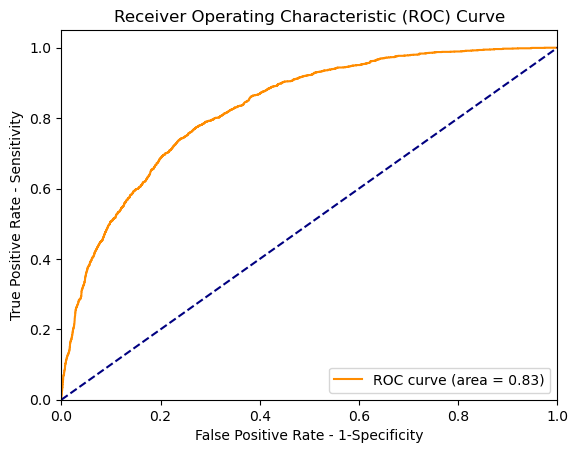

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y['Churn[Yes]'], predicted_p)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate - 1-Specificity')
plt.ylabel('True Positive Rate - Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
